# Risk Management - Problem Set 04
Authors:
- Dawid Włosek
- Julia Zezula

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

### Problem 01

In [138]:
#  Compute Value at Risk (VaR) at confidence level alpha for a standard normal distribution.
def compute_var(alpha: float) -> float:
    return -norm.ppf(alpha)


In [139]:
# Compute Expected Shortfall (ES) using the PDF-based integral definition.
def compute_es_pdf(alpha: float, var_alpha: float) -> float:
    def integrand(x):
        return x * norm.pdf(x)
    
    integral, _ = quad(integrand, -np.inf, -var_alpha)
    return -integral / alpha

In [140]:
# Compute Expected Shortfall (ES) using the quantile-based integral definition.
def compute_es_var(alpha: float) -> float:
    def integrand(gamma):
        return -norm.ppf(gamma)
    
    integral, _ = quad(integrand, 0, alpha)
    return integral / alpha

In [141]:
alpha = 0.05
var_alpha = compute_var(alpha)
es_pdf = compute_es_pdf(alpha, var_alpha)
es_var = compute_es_var(alpha)

print(f"ES - PDF integral definition: {es_pdf:.5f}")
print(f"ES - Quantile integral definition: {es_var:.5f}")
print(f"Difference between those two: {abs(es_pdf - es_var):.5e}")

ES - PDF integral definition: 2.06271
ES - Quantile integral definition: 2.06271
Difference between those two: 1.05755e-11


### Problem 02

In [142]:
#VaR for exponential distribution with λ=1
def var_exponential(alpha: np.ndarray) -> np.ndarray:
    return -np.log(alpha)

In [143]:
# ES for exponential distribution with λ=1.
def es_exponential(alpha: np.ndarray) -> np.ndarray:
    """ES for exponential distribution with λ=1."""
    return (1 - alpha * np.log(alpha) - alpha) / alpha

In [144]:
# VaR for standard normal distribution.
def var_normal(alpha: np.ndarray) -> np.ndarray:
    return -norm.ppf(alpha)

In [145]:
# ES for standard normal distribution using the quantile integral definition.
def es_normal(alpha: float) -> float:
    integrand = lambda gamma: -norm.ppf(gamma)
    integral, _ = quad(integrand, 0, alpha)
    return integral / alpha

In [146]:
# Vectorized ES computation for an array of alphas (standard normal)
def compute_es_normal_array(alphas: np.ndarray) -> np.ndarray:
    """Vectorized ES computation for an array of alphas (standard normal)."""
    return np.array([es_normal(a) for a in alphas])

In [147]:
def plot_var(alphas, VaR_exp, VaR_norm):
    plt.figure(figsize=(6, 4))
    plt.plot(alphas, VaR_exp, label='Exponential', color="pink")
    plt.plot(alphas, VaR_norm, label='Normal', color='blue')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$VaR_\alpha$')
    plt.title('VaR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [148]:
def plot_es(alphas, ES_exp, ES_norm):
    plt.figure(figsize=(6, 4))
    plt.plot(alphas, ES_exp, label='Exponential', color='pink')
    plt.plot(alphas, ES_norm, label='Normal', color='blue')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$ES_\alpha$')
    plt.title('ES')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [149]:
alphas = np.linspace(0.001, 0.2, 200)

# Compute values
VaR_exp = var_exponential(alphas)
ES_exp = es_exponential(alphas)
VaR_norm = var_normal(alphas)
ES_norm = compute_es_normal_array(alphas)

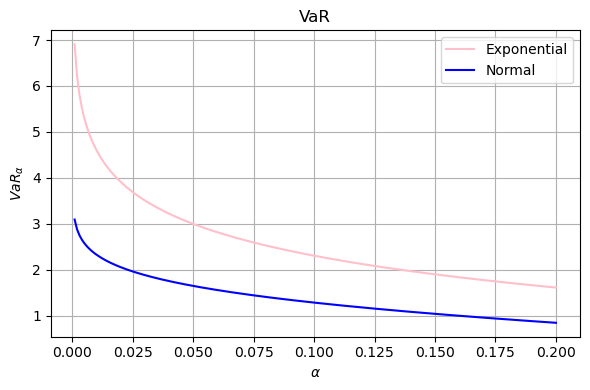

In [150]:
plot_var(alphas, VaR_exp, VaR_norm)

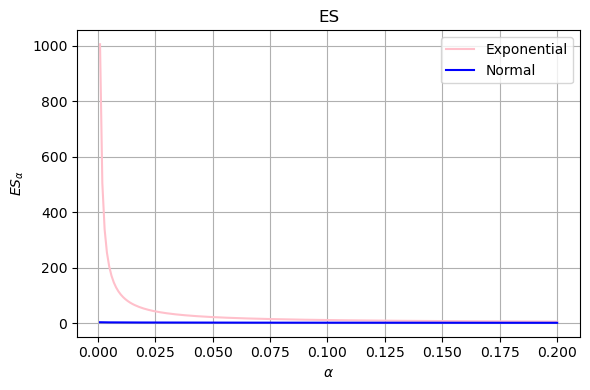

In [151]:
plot_es(alphas, ES_exp, ES_norm)

In [152]:
# Print a few values for debugging
for a in [0.01, 0.05, 0.07, 0.1, 0.11]:
    print(f"Expected shortfall normal({a}) : {es_normal(a):.4f}")

Expected shortfall normal(0.01) : 2.6652
Expected shortfall normal(0.05) : 2.0627
Expected shortfall normal(0.07) : 1.9181
Expected shortfall normal(0.1) : 1.7550
Expected shortfall normal(0.11) : 1.7094


### Problem 03

In [153]:
# (a)
def var_price(alpha, S0, mu, gamma, t):
    z = -norm.ppf(alpha)
    return S0*mu*t + S0*gamma*np.sqrt(t)*z

def es_price(alpha, S0, mu, gamma, t):
    z = -norm.ppf(alpha)
    phi_z = norm.pdf(z)
    return S0*mu*t + S0*gamma*np.sqrt(t)*(phi_z/alpha)

In [154]:
# (b)
S0 = 100
mu = 0.10
gamma1 = 0.20
t_day = 1/250
alpha_1loss = 1/250

var_b = var_price(alpha_1loss, S0, mu, gamma1, t_day)
es_b  = es_price(alpha_1loss, S0, mu, gamma1, t_day)
print(f"(b) daily VaR (γ=20%): {var_b:.4f} PLN,  ES: {es_b:.4f} PLN")

(b) daily VaR (γ=20%): 3.3946 PLN,  ES: 3.7864 PLN


In [155]:
# (c)
gamma2 = 0.30
var_c = var_price(alpha_1loss, S0, mu, gamma2, t_day)
es_c  = es_price(alpha_1loss, S0, mu, gamma2, t_day)
print(f"(c) daily VaR (γ=30%): {var_c:.4f} PLN,  ES: {es_c:.4f} PLN")

(c) daily VaR (γ=30%): 5.0719 PLN,  ES: 5.6596 PLN


In [156]:
# (d)
print("(d) daily VaR/ES for k losses per year")
for k in [1,2,3,5]:
    alpha = k/250
    v = var_price(alpha, S0, mu, gamma1, t_day)
    e = es_price(alpha, S0, mu, gamma1, t_day)
    print(f" k={k:>1} -> alpha={alpha:.4f} : VaR={v:.3f}, ES={e:.3f}")

(d) daily VaR/ES for k losses per year
 k=1 -> alpha=0.0040 : VaR=3.395, ES=3.786
 k=2 -> alpha=0.0080 : VaR=3.087, ES=3.506
 k=3 -> alpha=0.0120 : VaR=2.895, ES=3.332
 k=5 -> alpha=0.0200 : VaR=2.638, ES=3.102


In [157]:
# (e)
print("(e) daily VaR/ES over n‐year horizon")
for n in [1,2,3,5]:
    alpha = 1/(250*n)
    v = var_price(alpha, S0, mu, gamma1, t_day)
    e = es_price(alpha, S0, mu, gamma1, t_day)
    print(f" n={n:>1} -> alpha={alpha:.5f} : VaR={v:.3f}, ES={e:.3f}")

(e) daily VaR/ES over n‐year horizon
 n=1 -> alpha=0.00400 : VaR=3.395, ES=3.786
 n=2 -> alpha=0.00200 : VaR=3.681, ES=4.050
 n=3 -> alpha=0.00133 : VaR=3.839, ES=4.197
 n=5 -> alpha=0.00080 : VaR=4.032, ES=4.377


In [158]:
# (f)
t_week = 5/250
alpha_week = 1/52
v_f = var_price(alpha_week, S0, mu, gamma1, t_week)
e_f = es_price(alpha_week, S0, mu, gamma1, t_week)
print(f"(f) weekly VaR: {v_f:.4f} PLN,  ES: {e_f:.4f} PLN")

(f) weekly VaR: 6.0546 PLN,  ES: 7.0880 PLN


### Problem 04

In [159]:
prices = np.loadtxt('dat_St.txt')

# (a) daily log‐returns
R = np.log(prices[1:] / prices[:-1])
sd_R = np.std(R, ddof=1)
mean_R = np.mean(R)

# annualize
gamma_ann = np.sqrt(250) * sd_R
mu_ann    = 250 * mean_R

print(f"(a) annualized volatility γ = {gamma_ann:.4f}")
print(f"    annualized mean return mu = {mu_ann:.4f}")

(a) annualized volatility γ = 0.2018
    annualized mean return mu = 0.1109


In [160]:
# (b)
investment = 10e6
t_day = 1/250
alphas = [0.01, 0.05, 0.10, 0.20]

print("(b) daily Gaussian VaR/ES")
for alpha in alphas:
    v = var_price(alpha, investment, mu_ann, gamma_ann, t_day)
    e = es_price(alpha, investment, mu_ann, gamma_ann, t_day)
    print(f" alpha={alpha:.2f} : VaR={v:,.0f}  ES={e:,.0f}")

(b) daily Gaussian VaR/ES
 alpha=0.01 : VaR=301,286  ES=344,526
 alpha=0.05 : VaR=214,325  ES=267,645
 alpha=0.10 : VaR=167,967  ES=228,378
 alpha=0.20 : VaR=111,831  ES=183,057


In [161]:
# (c)
t_week = 5/250
print("\n(c) weekly Gaussian VaR/ES")
for alpha in alphas:
    v = var_price(alpha, investment, mu_ann, gamma_ann, t_week)
    e = es_price(alpha, investment, mu_ann, gamma_ann, t_week)
    print(f" alpha={alpha:.2f} : VaR={v:,.0f}  ES={e:,.0f}")


(c) weekly Gaussian VaR/ES
 alpha=0.01 : VaR=685,962  ES=782,650
 alpha=0.05 : VaR=491,512  ES=610,739
 alpha=0.10 : VaR=387,852  ES=522,935
 alpha=0.20 : VaR=262,327  ES=421,594


In [162]:
# (d)
delta_S_daily = investment * (prices[1:]/prices[:-1] - 1)

def empirical_var_es(x, alpha):
    q = np.quantile(x, alpha)
    var = -q
    es  = -x[x <= q].mean()
    return var, es

print("\n(d) empirical daily VaR/ES")
for alpha in alphas:
    v, e = empirical_var_es(delta_S_daily, alpha)
    print(f" alpha={alpha:.2f} : VaR={v:,.0f}  ES={e:,.0f}")


(d) empirical daily VaR/ES
 alpha=0.01 : VaR=286,967  ES=327,505
 alpha=0.05 : VaR=196,993  ES=251,631
 alpha=0.10 : VaR=153,697  ES=212,627
 alpha=0.20 : VaR=107,002  ES=170,607


In [163]:
# (e)
prices_w = prices[::5]
delta_S_weekly = investment * (prices_w[1:]/prices_w[:-1] - 1)

print("\n(e) empirical weekly VaR/ES")
for alpha in alphas:
    v, e = empirical_var_es(delta_S_weekly, alpha)
    print(f" alpha={alpha:.2f} : VaR={v:,.0f}  ES={e:,.0f}")


(e) empirical weekly VaR/ES
 alpha=0.01 : VaR=563,067  ES=596,531
 alpha=0.05 : VaR=448,150  ES=522,150
 alpha=0.10 : VaR=349,369  ES=464,545
 alpha=0.20 : VaR=218,574  ES=370,950


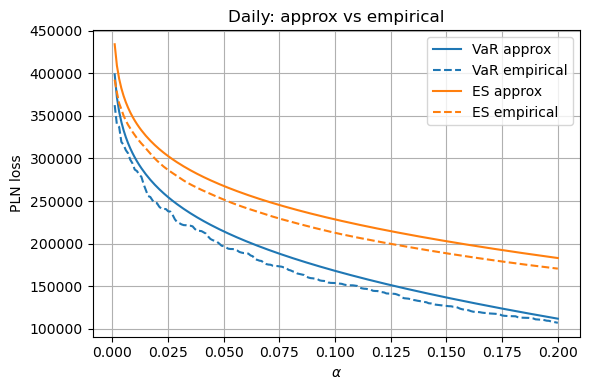

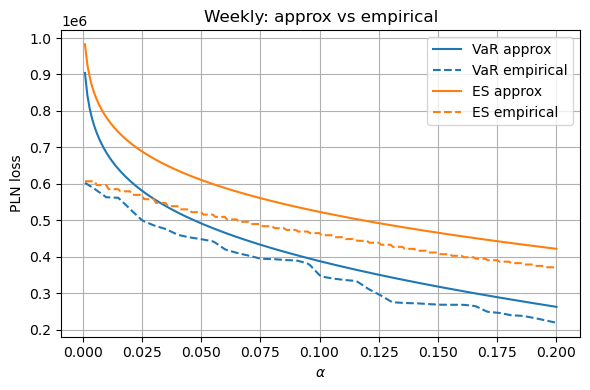

In [164]:
# (f)
alphas_plot = np.linspace(0.001, 0.2, 200)

# approximate daily
VaR_approx_d = [var_price(a, investment, mu_ann, gamma_ann, t_day) for a in alphas_plot]
ES_approx_d  = [es_price(a,  investment, mu_ann, gamma_ann, t_day) for a in alphas_plot]

# empirical daily
VaR_emp_d = [-np.quantile(delta_S_daily, a) for a in alphas_plot]
ES_emp_d  = [-delta_S_daily[delta_S_daily <= np.quantile(delta_S_daily,a)].mean() for a in alphas_plot]

plt.figure(figsize=(6,4))
plt.plot(alphas_plot, VaR_approx_d, label='VaR approx', color='C0')
plt.plot(alphas_plot, VaR_emp_d,    label='VaR empirical', linestyle='--', color='C0')
plt.plot(alphas_plot, ES_approx_d,  label='ES approx', color='C1')
plt.plot(alphas_plot, ES_emp_d,     label='ES empirical', linestyle='--', color='C1')
plt.xlabel(r'$\alpha$'); plt.ylabel('PLN loss')
plt.title('Daily: approx vs empirical')
plt.legend(); plt.grid(True); plt.tight_layout()

# approximate weekly
VaR_approx_w = [var_price(a, investment, mu_ann, gamma_ann, t_week) for a in alphas_plot]
ES_approx_w  = [es_price(a,  investment, mu_ann, gamma_ann, t_week) for a in alphas_plot]

# empirical weekly
VaR_emp_w = [-np.quantile(delta_S_weekly, a) for a in alphas_plot]
ES_emp_w  = [-delta_S_weekly[delta_S_weekly <= np.quantile(delta_S_weekly,a)].mean() for a in alphas_plot]

plt.figure(figsize=(6,4))
plt.plot(alphas_plot, VaR_approx_w, label='VaR approx', color='C0')
plt.plot(alphas_plot, VaR_emp_w,    label='VaR empirical', linestyle='--', color='C0')
plt.plot(alphas_plot, ES_approx_w,  label='ES approx', color='C1')
plt.plot(alphas_plot, ES_emp_w,     label='ES empirical', linestyle='--', color='C1')
plt.xlabel(r'$\alpha$'); plt.ylabel('PLN loss')
plt.title('Weekly: approx vs empirical')
plt.legend(); plt.grid(True); plt.tight_layout()